### Download The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [2]:
car_df = pd.read_csv("hf://datasets/VarunKumarGupta2003/Car-Price-Dataset/car_sales_data.csv")

In [3]:
car_df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,1.3,156577,Diesel,Manual,19240.996903
1,Audi,Model D,2017,1.1,192529,Electric,Manual,20281.779257
2,BMW,Model E,2000,3.7,156962,Electric,Automatic,19178.745634
3,Audi,Model D,2007,2.9,183057,Petrol,Manual,22090.033440
4,Audi,Model D,2000,3.4,108269,Petrol,Manual,21124.237648


### Inspect The Data

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine Size   10000 non-null  float64
 4   Mileage       10000 non-null  int64  
 5   Fuel Type     10000 non-null  object 
 6   Transmission  10000 non-null  object 
 7   Price         10000 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


### Visualize The Data

### 1. Distribution

#### a.) Year

In [5]:
car_df['Year'].describe()

count    10000.000000
mean      2010.574300
std          6.324056
min       2000.000000
25%       2005.000000
50%       2011.000000
75%       2016.000000
max       2021.000000
Name: Year, dtype: float64

In [6]:
fig = px.histogram(
    car_df,
    x='Year',
    marginal='box',
    nbins=21,
    title="Year Distribution"
)
fig.update_layout(bargap=0.1, title={"y":0.9, "x":0.5})

#### b.) Engine Size

In [7]:
car_df['Engine Size'].describe()

count    10000.00000
mean         2.76482
std          1.00941
min          1.00000
25%          1.90000
50%          2.80000
75%          3.60000
max          4.50000
Name: Engine Size, dtype: float64

In [8]:
fig = px.histogram(
    car_df,
    x='Engine Size',
    nbins=5,
    marginal='box',
    title="Engine Size Distribution"
)
fig.update_layout(bargap=0.1, title={ "y":0.9, "x":0.5})

#### c.) Mileage

In [9]:
car_df['Mileage'].describe()

count     10000.000000
mean      99292.395800
std       57811.288734
min           5.000000
25%       49217.750000
50%       99345.000000
75%      149568.000000
max      199987.000000
Name: Mileage, dtype: float64

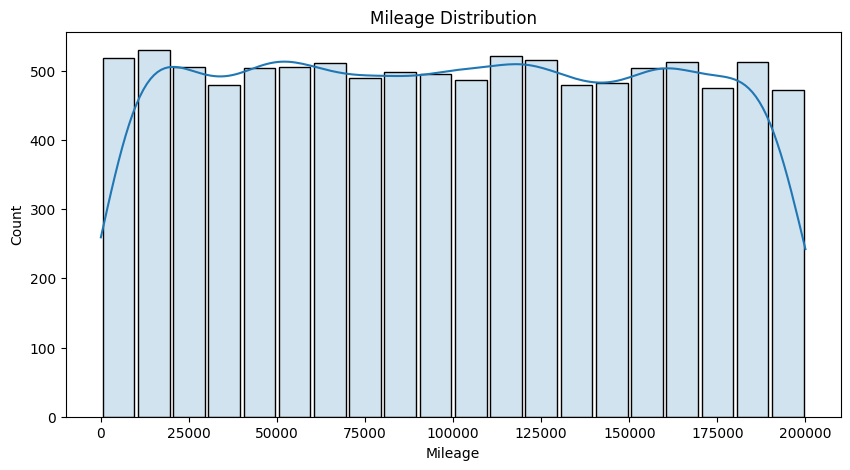

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=car_df, x='Mileage', bins=20, shrink=0.9, alpha=0.2, kde=True)
plt.title('Mileage Distribution')
plt.show()

In [11]:
fig = px.histogram(
    car_df,
    x="Mileage",
    nbins=20,
    marginal='box',
    width=1000,
    height=500,
    title='Mileage Distribution'
)
fig.update_layout( bargap=0.1, title={ 'y':0.9, 'x':0.5} )

### d.) Price Distribution

In [12]:
car_df['Price'].describe()

count    10000.000000
mean     24853.320959
std       5172.634275
min       8657.963423
25%      21159.737460
50%      24828.917262
75%      28486.241217
max      40739.892708
Name: Price, dtype: float64

In [13]:
fig = px.histogram(
    car_df,
    x="Price",
    marginal="box",
    title="Price Distribution",
    nbins=40,
    width=1000,
    height=500
)
fig.update_layout(bargap=0.1, title={"y":0.9, "x":0.5})

### e.) Make

In [14]:
car_df['Make'].describe()

count      10000
unique         5
top       Toyota
freq        2047
Name: Make, dtype: object

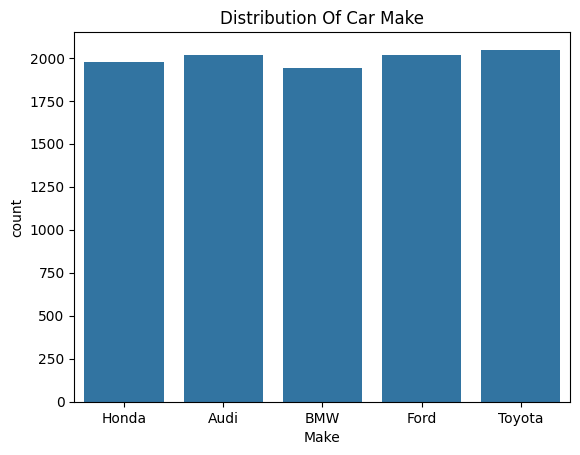

In [15]:
sns.countplot(data=car_df, x='Make')
plt.title('Distribution Of Car Make')
plt.show()

In [16]:
fig = px.histogram(
    car_df,
    x='Make',
    title='Distribution Of Car Make'
)
fig.update_layout(bargap=0.1)

### f.) Transmission

In [17]:
fig = px.histogram(
    car_df,
    x='Transmission',
    title='Distribution Of Car Transmission'
)
fig.update_layout(bargap=0.1)

### h.) Model

In [18]:
fig = px.histogram(
    car_df,
    x='Model',
    title='Distribution Of Car Model'
)
fig.update_layout(bargap=0.1)

### i.) Fuel Type

In [19]:
fig = px.histogram(
    car_df,
    x='Fuel Type',
    title='Distribution Of Fuel Type'
)
fig.update_layout(bargap=0.1)

## 2. Relationships With The Target

#### a.) Year

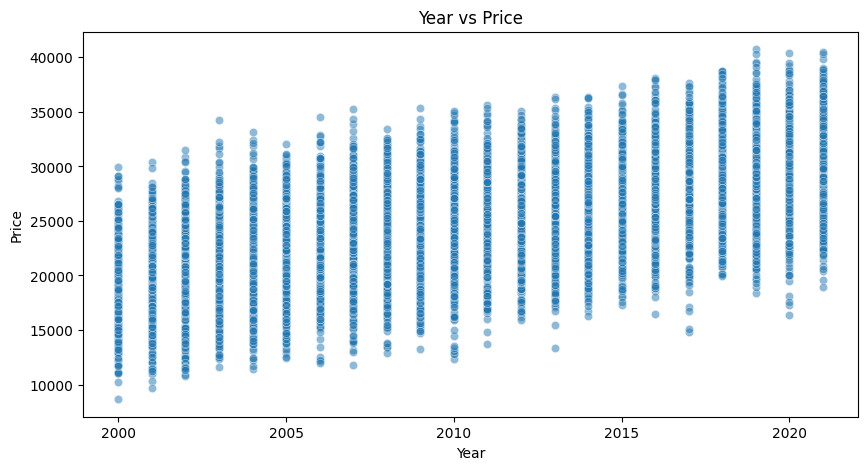

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=car_df,
    x='Year',
    y='Price',
    alpha=0.5
)
plt.title('Year vs Price')
plt.show()

In [21]:
car_df.columns

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')

#### b.) Engine Size

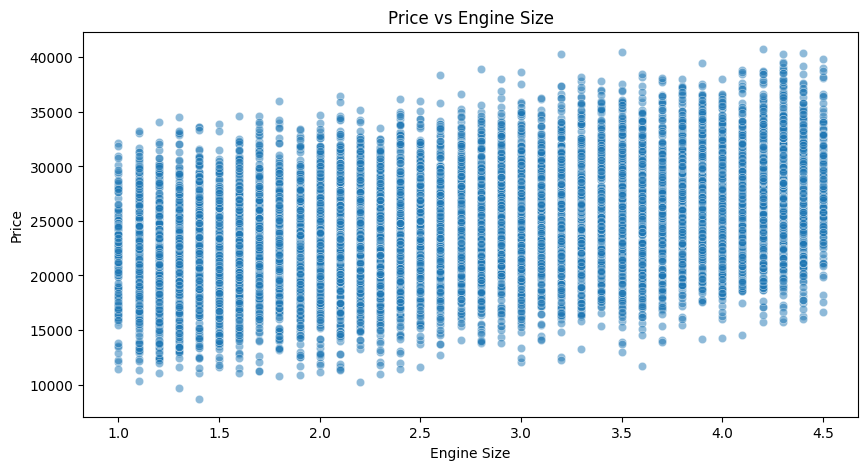

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=car_df,
    x='Engine Size',
    y='Price',
    alpha=0.5
)
plt.title("Price vs Engine Size")
plt.show()

#### c.) Mileage

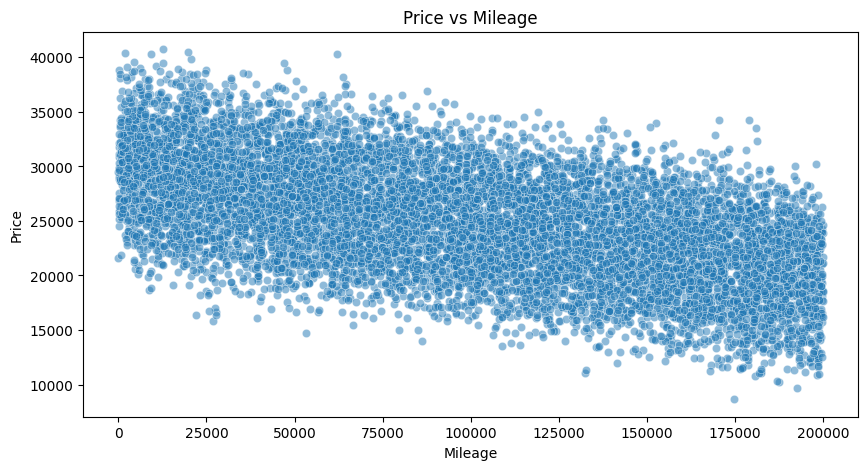

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=car_df,
    x='Mileage',
    y='Price',
    alpha=0.5
)
plt.title('Price vs Mileage')
plt.show()

#### d.) Make

In [24]:
# Encode
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [25]:
encoded = encoder.fit_transform(car_df[['Make','Model', 'Fuel Type', 'Transmission']])
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40000 stored elements and shape (10000, 15)>

In [26]:
make_encoded = pd.DataFrame(
    encoded.toarray(),
    columns=encoder.get_feature_names_out(['Make', 'Model', 'Fuel Type', 'Transmission'])
)
car_df_encoded = pd.concat([car_df, make_encoded], axis=1).drop(columns=['Make', 'Model', 'Fuel Type', 'Transmission'], inplace=False)
car_df_encoded

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Model_Model A,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2015,1.3,156577,19240.996903,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2017,1.1,192529,20281.779257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2000,3.7,156962,19178.745634,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2007,2.9,183057,22090.033440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2000,3.4,108269,21124.237648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008,2.4,46784,26642.475776,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9996,2002,3.2,6621,27486.488777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9997,2011,3.7,61037,27132.213762,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,2019,3.1,190175,23925.403607,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Correlation

In [27]:
corr = car_df_encoded.corr(numeric_only=True)

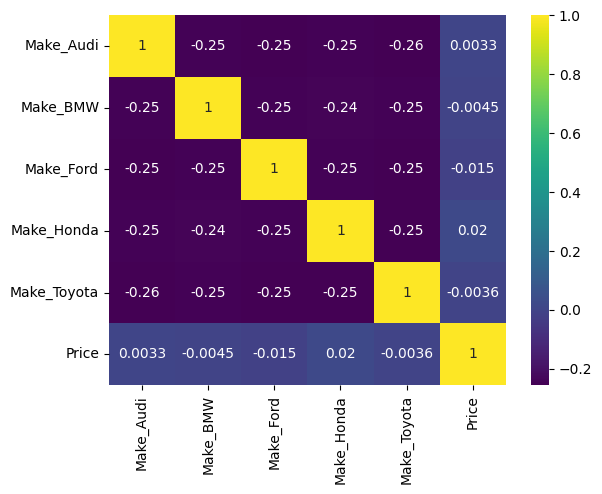

In [28]:
encoded_cols = [col for col in car_df_encoded.columns if 'Make_' in col]
sns.heatmap(car_df_encoded[encoded_cols + ['Price']].corr(), annot=True, cmap='viridis')
plt.show()


In [29]:
car_df_encoded.head()

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Model_Model A,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2015,1.3,156577,19240.996903,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2017,1.1,192529,20281.779257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2000,3.7,156962,19178.745634,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2007,2.9,183057,22090.033440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2000,3.4,108269,21124.237648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
cols = ['Year', 'Engine Size', 'Mileage', 'Price']

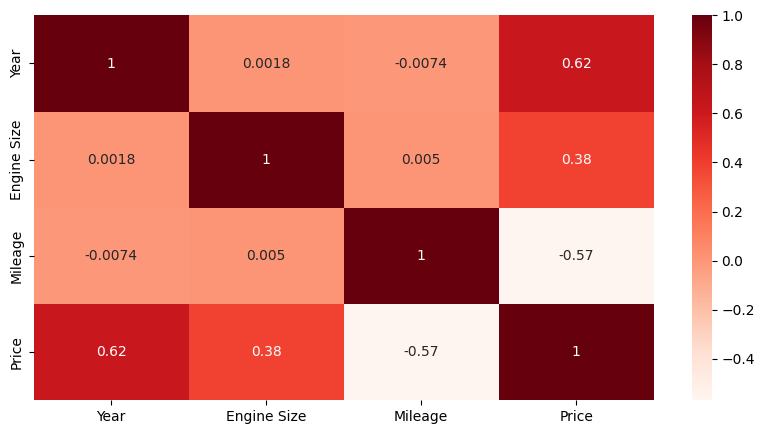

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(car_df_encoded[cols].corr(), annot=True, cmap='Reds')
plt.show()

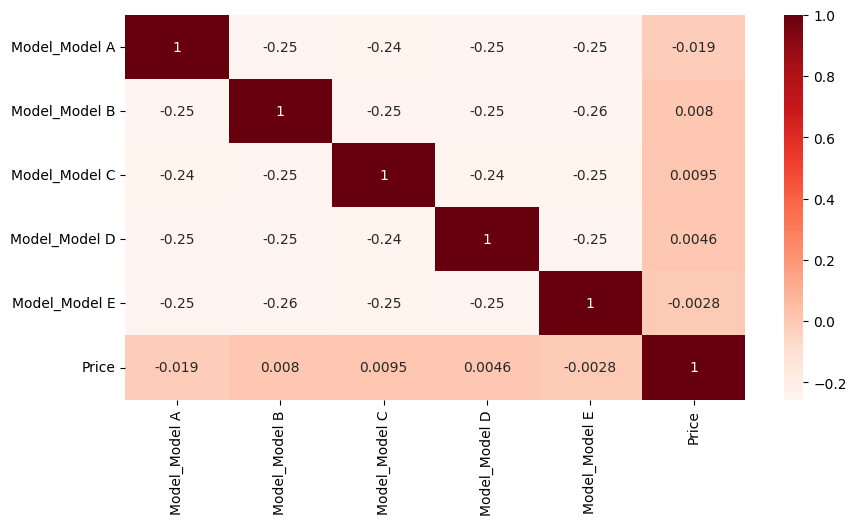

In [32]:
cols = [col for col in car_df_encoded if 'Model_' in col]
plt.figure(figsize=(10,5))
sns.heatmap(car_df_encoded[cols + ['Price']].corr(), annot=True, cmap='Reds')
plt.show()

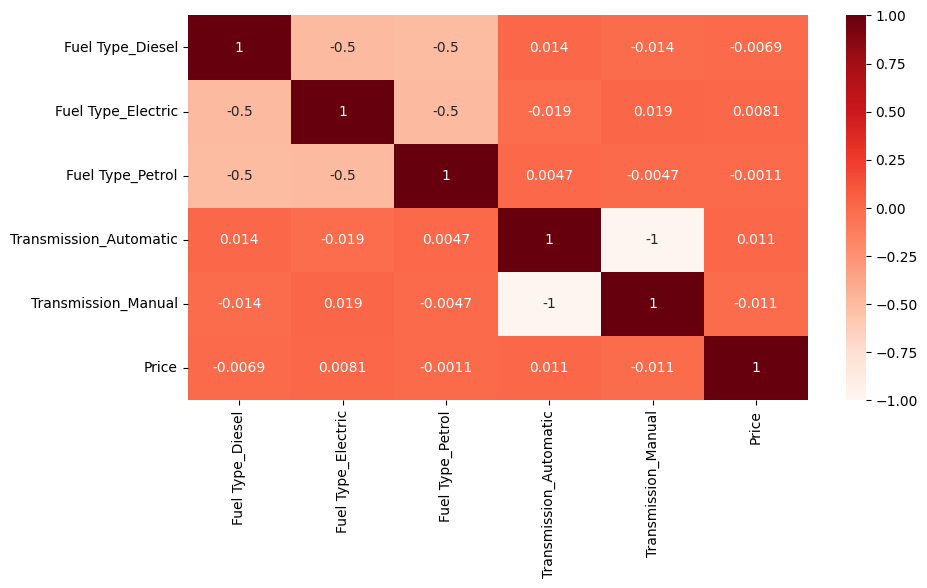

In [33]:
cols = [col for col in car_df_encoded if 'Fuel' in col or 'Transmission' in col]
plt.figure(figsize=(10,5))
sns.heatmap(car_df_encoded[cols + ['Price']].corr(), annot=True, cmap='Reds')
plt.show()

## MODEL CREATION

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
model = LinearRegression()

In [36]:
y = car_df_encoded['Price']
X = car_df_encoded[[col for col in car_df_encoded if col != 'Price']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [38]:
# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
#Prediction
y_pred = model.predict(X_test)

In [40]:
print("The MSE is : ", mean_squared_error(y_test, y_pred))

The MSE is :  3980100.696651303


In [42]:
r2_score(y_test, y_pred)

0.850752246107704